In [1]:
  import numpy as np
import pandas as pd
import scipy.stats as stats
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix


In [2]:
df = pd.read_csv('../dataset/ml-latest-small/ratings.csv')
df = df[['userId', 'movieId', 'rating']]
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
df.values

array([[1.00000e+00, 1.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 4.00000e+00],
       [1.00000e+00, 6.00000e+00, 4.00000e+00],
       ...,
       [6.10000e+02, 1.68250e+05, 5.00000e+00],
       [6.10000e+02, 1.68252e+05, 5.00000e+00],
       [6.10000e+02, 1.70875e+05, 3.00000e+00]])

In [28]:
df = pd.read_csv('../dataset/ml-latest-small/ratings.csv')
df = df.pivot_table(index=df['userId'], columns='movieId', values='rating').fillna(0)

sparse_matrix = csr_matrix(df)
dense_array = sparse_matrix.toarray()


kmeans = KMeans(n_clusters=4)
kmeans.fit(dense_array)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

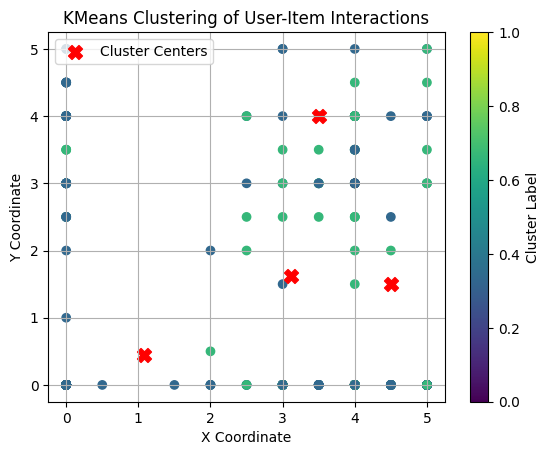

In [29]:
# Extract x, y coordinates and values from the matrix
x_coords = dense_array[:, 0]
y_coords = dense_array[:, 1]
values = dense_array[:, 2]

# Plot the data points with cluster assignments
plt.scatter(x_coords, y_coords, c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=100, c='red', label='Cluster Centers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KMeans Clustering of User-Item Interactions')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
dense_array[0:5]

array([[4., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

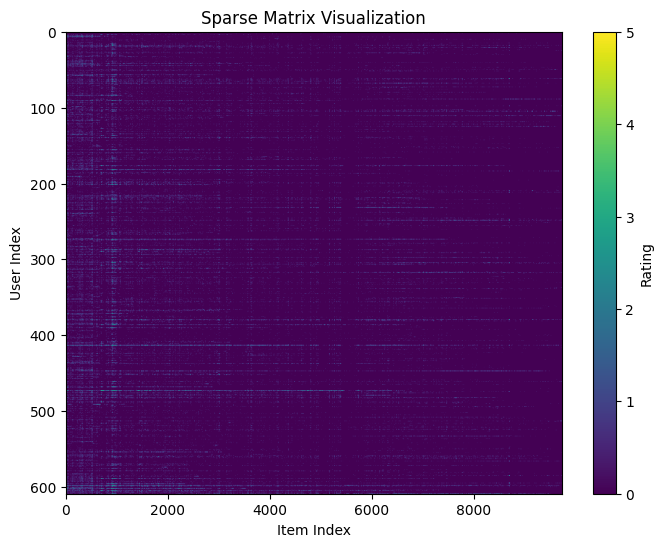

In [36]:

# Plot the sparse matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(sparse_matrix.toarray(), cmap='viridis', aspect='auto')
plt.colorbar(label='Rating')main
plt.xlabel('Item Index')
plt.ylabel('User Index')
plt.title('Sparse Matrix Visualization')
plt.show()